# Analisis de Datos del Grupo J
## **Universidad Nacional de la Pampa  y Universidad Nacional de Villa Maria**

En esta notebook se abordara el análisis de los datos extraídos durante el proceso de ETL, con el objetivo de proporcionar un marco para que el **Consejo Nacional de Calidad de la Educación** pueda crear una estrategía de estimulación de carreras, utilizando como base análisis de las diferentes poblaciones de estudiantes.

**Los objetivos de este análisis son:**
  - Realizar un análisis exploratorio de las universidades de este grupo
  - Realizar una análisis descriptivo
  - Obtener datos relevantes, comunmente conocidos como insights
  - Concluir los aspectos más importantes del dataset

# Configuraciones

En esta sección configuramos todo lo necesario para el análisis, desde las librerías utilizadas hasta los colores elegidos para realizar los gráficos y las propiedades escenciales de cada uno, para así mantener una consistencia.

In [144]:
#Realizamos los imports necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

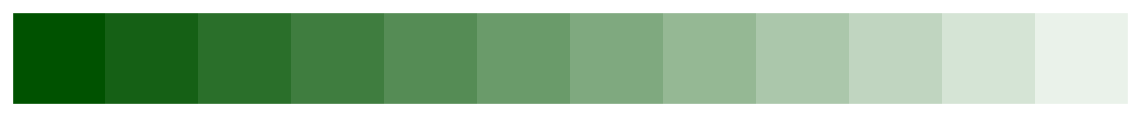

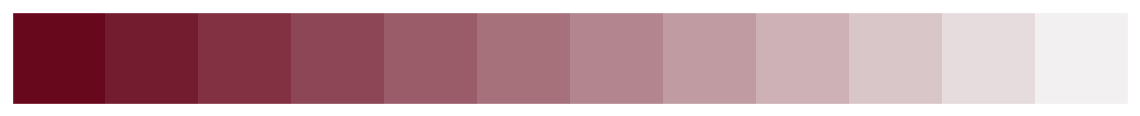

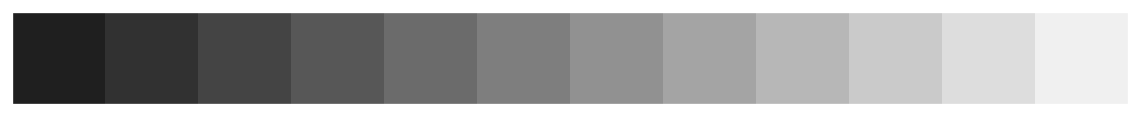

In [145]:
plt.rcParams['figure.dpi'] = 120
plt.rcParams['legend.frameon'] = False

sns.set_style('dark')
colors_green = sns.light_palette("#005200", input='rgb',n_colors=12)[::-1]
colors_red = sns.light_palette("#68081C", input='rgb',n_colors=12)[::-1]
colors_dark = sns.light_palette("#1F1F1F", input='rgb',n_colors=12)[::-1]

sns.palplot(colors_green)
sns.palplot(colors_red)
sns.palplot(colors_dark)

# Importaciones de los datos

En esta sección **importamos los datasets transformados** y además datos externos de la base de datos geonames para extraer las provincias de los alumnos, con el fin de realizar un análisis más profundo respecto a la **variable geográfica**.

In [146]:
#Colocamos el nombre de las universidades en dos variables
#Para una futura reutilización del codigo

university1 = 'GrupoJ_Pampa2'
university1_name = 'Universidad Nacional de La Pampa'

university2 = 'GrupoJ_Villa_maria2'
university2_name = 'Universidad Nacional de Villa Maria'

df_1 = pd.read_csv(f'../../datasets/{university1}_process.txt', sep=',')
df_2 = pd.read_csv(f'../../datasets/{university2}_process.txt', sep=',')
df_geonames = pd.read_csv('../AR_geonames.txt', sep='\t', header=None)


# Primer acercamiento, correcciones y transformaciones adicionales

En esta sección vemos los aspectos fundamentales de los datos a trabajar, hacemos algunas correcciones y expandimos los datos

In [147]:
#imprimimos las columnas
df_1.columns 

Index(['university', 'career', 'inscription_date', 'first_name', 'last_name',
       'gender', 'age', 'postal_code', 'location', 'email'],
      dtype='object')

In [148]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1304 entries, 0 to 1303
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   university        1304 non-null   object
 1   career            1304 non-null   object
 2   inscription_date  1304 non-null   object
 3   first_name        1304 non-null   object
 4   last_name         1304 non-null   object
 5   gender            1304 non-null   object
 6   age               1304 non-null   int64 
 7   postal_code       1304 non-null   int64 
 8   location          1304 non-null   object
 9   email             1304 non-null   object
dtypes: int64(2), object(8)
memory usage: 102.0+ KB


In [149]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3763 entries, 0 to 3762
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        3763 non-null   int64 
 1   university        3763 non-null   object
 2   career            3763 non-null   object
 3   inscription_date  3763 non-null   object
 4   first_name        3763 non-null   object
 5   last_name         3763 non-null   object
 6   gender            3763 non-null   object
 7   age               3763 non-null   int64 
 8   postal_code       3763 non-null   int64 
 9   location          3763 non-null   object
 10  email             3763 non-null   object
dtypes: int64(3), object(8)
memory usage: 323.5+ KB


In [150]:
print(f'La cantida de carreras en la {university1_name} es de:',len(df_1.career.unique()))
print(f'La cantida de carreras en la {university2_name} es de:',len(df_1.career.unique()))

La cantida de carreras en la Universidad Nacional de La Pampa es de: 33
La cantida de carreras en la Universidad Nacional de Villa Maria es de: 33


In [151]:
df_1.describe()

,age,postal_code
count,1304.000000,1304.000000
mean,59.118865,4773.776074
std,24.474094,2226.963738
min,18.000000,1602.000000
25%,38.000000,3005.250000
50%,59.000000,4551.500000
75%,81.000000,6464.500000
max,100.000000,9421.000000


In [152]:
df_2.describe()

,Unnamed: 0,age,postal_code
count,3763.000000,3763.000000,3763.000000
mean,1881.000000,47.665692,4735.768270
std,1086.428859,30.771670,2181.324644
min,0.000000,2.000000,1601.000000
25%,940.500000,18.000000,2944.000000
50%,1881.000000,46.000000,4413.000000
75%,2821.500000,74.000000,6443.000000
max,3762.000000,102.000000,9421.000000


Las únicas variables númericas dentro del dataset es la edad y el código postal, aunque este último más bien debería considerarse como categórica. Por lo tanto gráficamos como se vería la distribución de los valores de edad.

Text(0, 0.5, 'Cantidad')

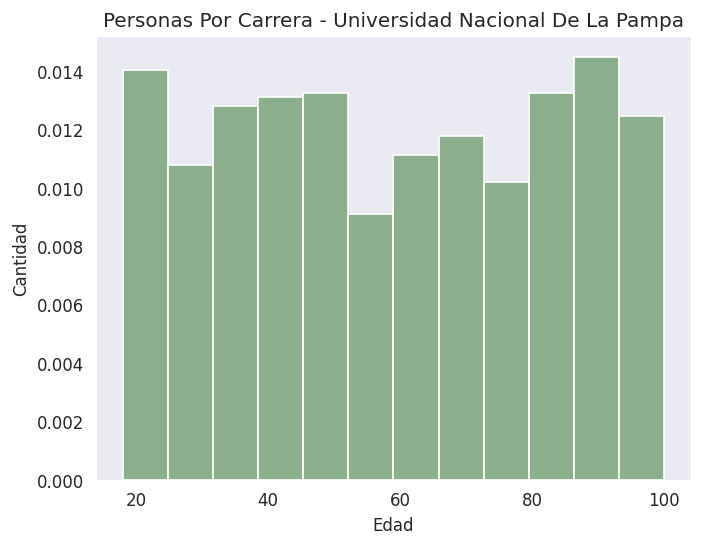

In [153]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Cantidad')

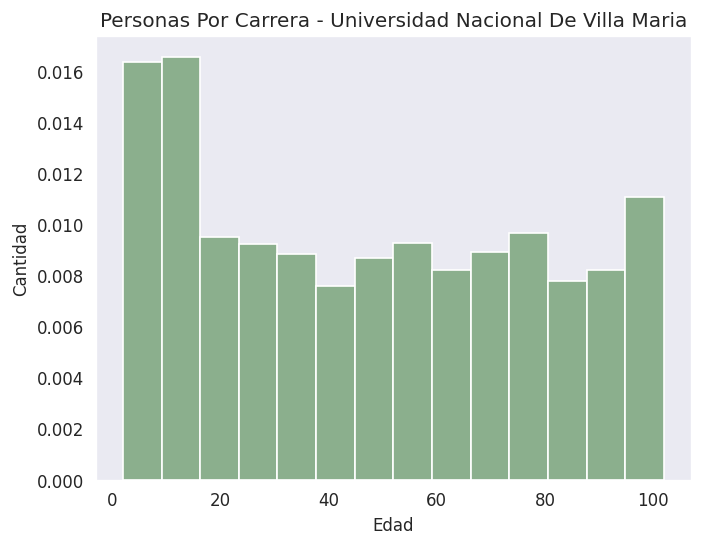

In [154]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Cantidad')

Como vemos que las edades tienen valores que no son coherentes, como serían alumnos menores de 15 años y mayores de 85, siendo que la edad de ingreso a la universidad usualmente es de 17-18 años y siendo que la esperanza de vida de argentina es hasta los 72 años aproximadamente (1).

(1) https://datosmacro.expansion.com/demografia/esperanza-vida/argentina#:~:text=En%202020%20la%20esperanza%20de,fue%20de%2073%2C41%20a%C3%B1os.

In [155]:
df_1 = df_1[df_1.age.between(15,85)]
df_2 = df_2[df_2.age.between(15,85)]

Text(0, 0.5, 'Porcentaje')

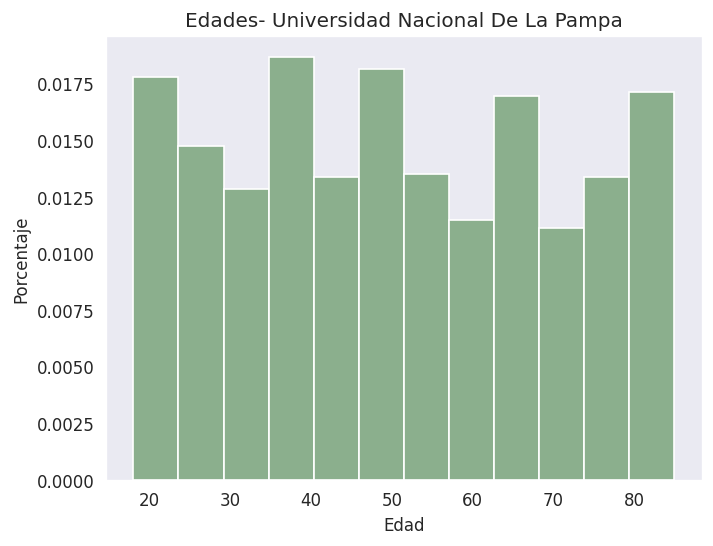

In [156]:
sns.histplot(df_1.age, color=colors_green[5],stat='density')
plt.title(f'Edades- {university1_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Porcentaje')

se ve una distribucion uniforme descendiendo hacia las mayores edades

Text(0, 0.5, 'Porcentaje')

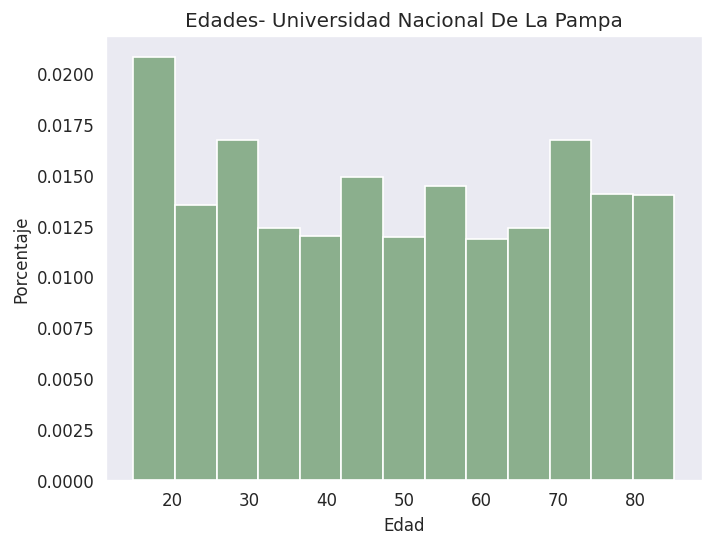

In [157]:
sns.histplot(df_2.age, color=colors_green[5],stat='density')
plt.title(f'Edades- {university1_name}'.title())
plt.xlabel('Edad')
plt.ylabel('Porcentaje')

La distribución de las de dades para esta universidad parece tratarse de una distribución uniforme con mayor cantidad en edades de 17 a 20.

Las variables de este dataset extraido corresponde a las siguientes columnas:

- **'university'**: esta variable menciona la universidad en la que asiste el alumno
- **'career'**: carrera de la que es alumno
- **'inscription_date'**: fecha en la que se inscribio, 
- **'first_name'**: nombres
- **'last_name'**: apellido/s
- **'gender'**: género declarado
- **'age'**: edad en años
- **'postal_code'**: código postal
- **'location'**: localidad
- **'email'**: mail de contacto

In [158]:
df_geonames.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11
0,AR,3636,"POZO CERCADO (EL CHORRO (F), DPTO. RIVADAVIA (S))",Salta,A,NaN,NaN,NaN,NaN,-23.4933,-61.9267,3
1,AR,4123,LAS SALADAS,Salta,A,NaN,NaN,NaN,NaN,-25.7833,-64.5000,4


Este dataset externo trae datos para enriquecer el dataset original y aporta variables imporantes como la **region**, que en este caso hace referencia a la provincia.

In [159]:
df_geonames.dropna(axis=1, inplace=True)

Realizamos la combinacion de los datasets

In [160]:
df_geonames.columns = ['country','postal_code', 'location', 'region', 'type', 'lat', 'lon', 'type_2']

In [161]:
df_1geonames_merge = df_geonames.merge(df_1, on='postal_code', how='right')

In [162]:
df_1geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,3232,CABRED,Corrientes,W,-30.0167,-57.6333,4.0,universidad nacional de la pampa,licenciatura en musicoterapia,2021-01-22,brett,roberts,male,22,cabred,deannalarson@hotmail.com
1,AR,3232,GUAVIRAVI,Corrientes,W,-29.3667,-56.8333,4.0,universidad nacional de la pampa,licenciatura en musicoterapia,2021-01-22,brett,roberts,male,22,cabred,deannalarson@hotmail.com


In [163]:
df_2geonames_merge = df_geonames.merge(df_2, on='postal_code', how='right')
df_2geonames_merge.head(2)

,country,postal_code,location_x,region,type,lat,lon,type_2,Unnamed: 0,university,career,inscription_date,first_name,last_name,gender,age,location_y,email
0,AR,8415,QUINIÑAU,Rio Negro,R,-41.7567,-70.8033,3.0,0,universidad nacional de villa maría,bioquímica,2020-04-19,nicholas,greer,male,80,arroyo las minas,noahgates@hotmail.com
1,AR,8415,REPOLLOS,Rio Negro,R,-41.8500,-71.4167,4.0,0,universidad nacional de villa maría,bioquímica,2020-04-19,nicholas,greer,male,80,arroyo las minas,noahgates@hotmail.com


Podemos observar nuestro dataset expandido con los nuevos datos geográficos.

# Análisis exploratorío

Un primer paso para describir nuestro dataset es ver las carreras cursadas dentro de las universidades estudiadas

### Curriculas

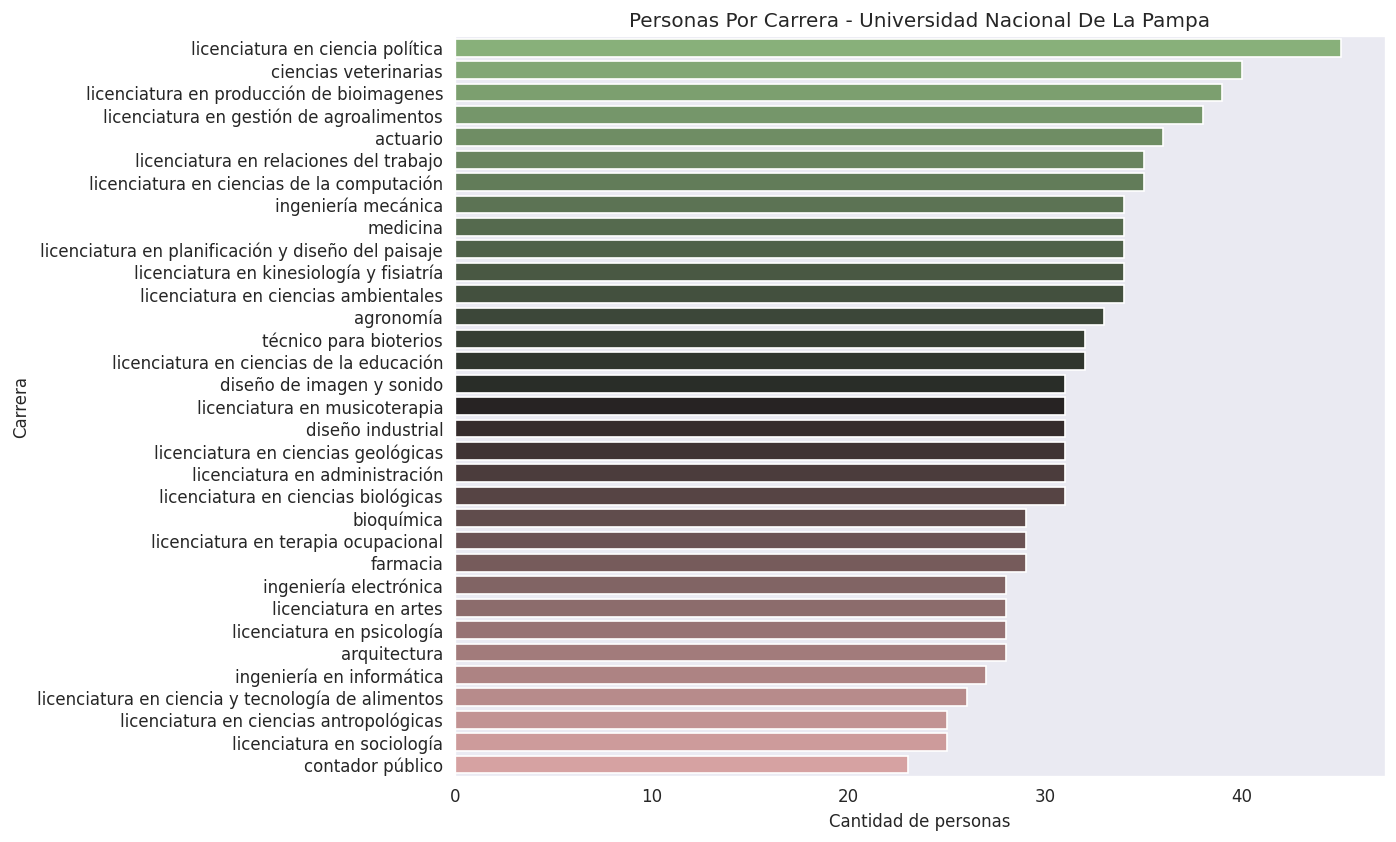

In [164]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

En principio podémos observar que hay una diferencia entre la cantidad de personas que componen el alumnado, al observar el total de alumnos de cada carrera. Tambien se ve que la carrera mas concurrida tiene mucho mas alumnos. 

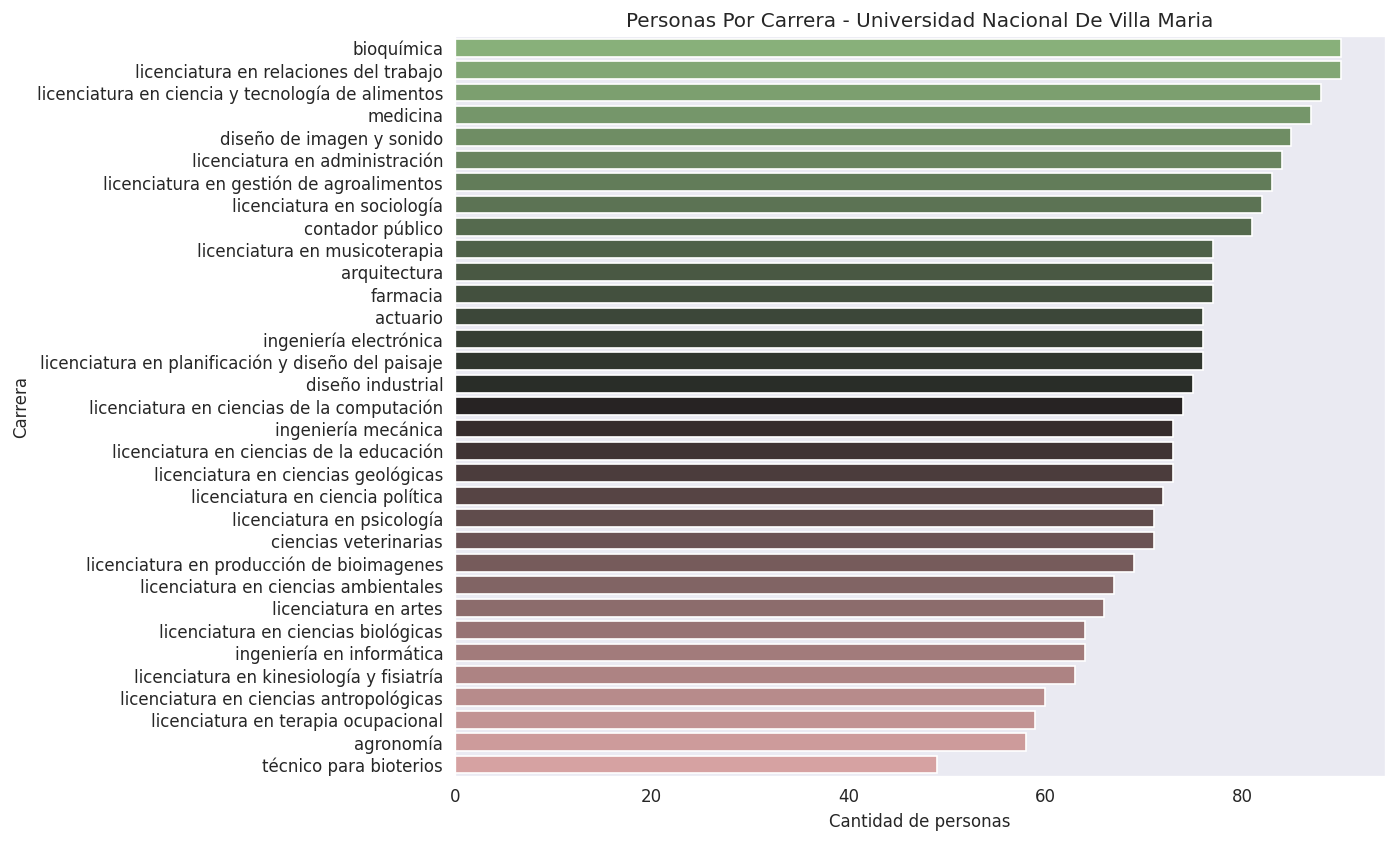

In [165]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
palette = sns.diverging_palette(120,12,s=55,l=70,n=33,center='dark')
plt.figure(figsize=(10, 8))
sns.barplot(data=df_aux, x='university', y='career', palette=palette)

plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Carrera')

plt.show()

Esto es algo que se repite en esta universidad, pero la cantidad de alumnos por carrera es menor y la diferencia parece ser más atenuada entre la carrera más concurrida con la menor concurrida.

## Detalle de la variable carrera

Para evaluar más en detalle la composición de alumnos para las diferentes carreras se propone observar las diez carreras con más alumnos de cada universidad y las 10 carreras con menos alumnos de cada universidad, para además comparar con la media de alumnos de toda la oferta académica.



### Universidad Nacional de La Pampa

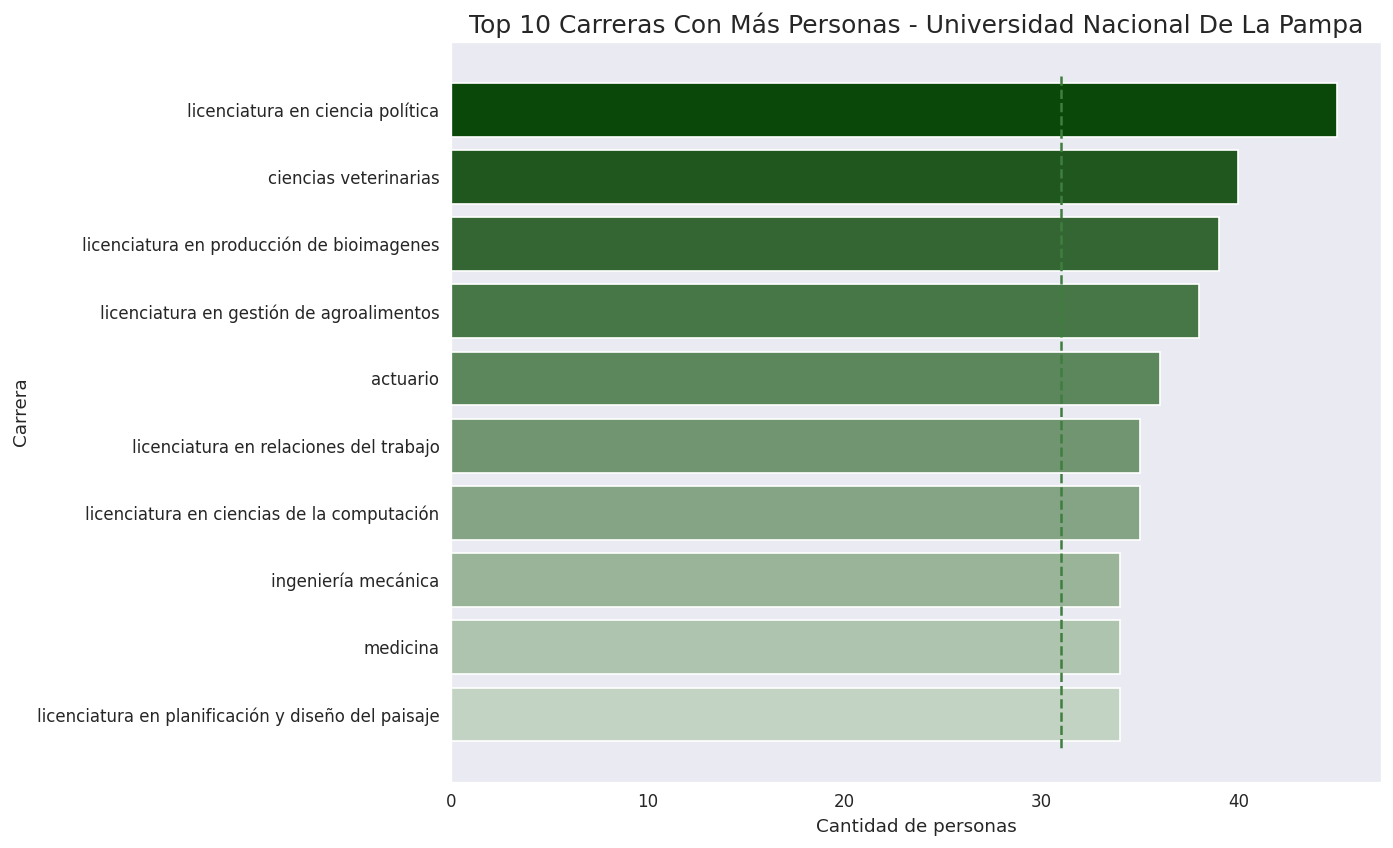

In [166]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

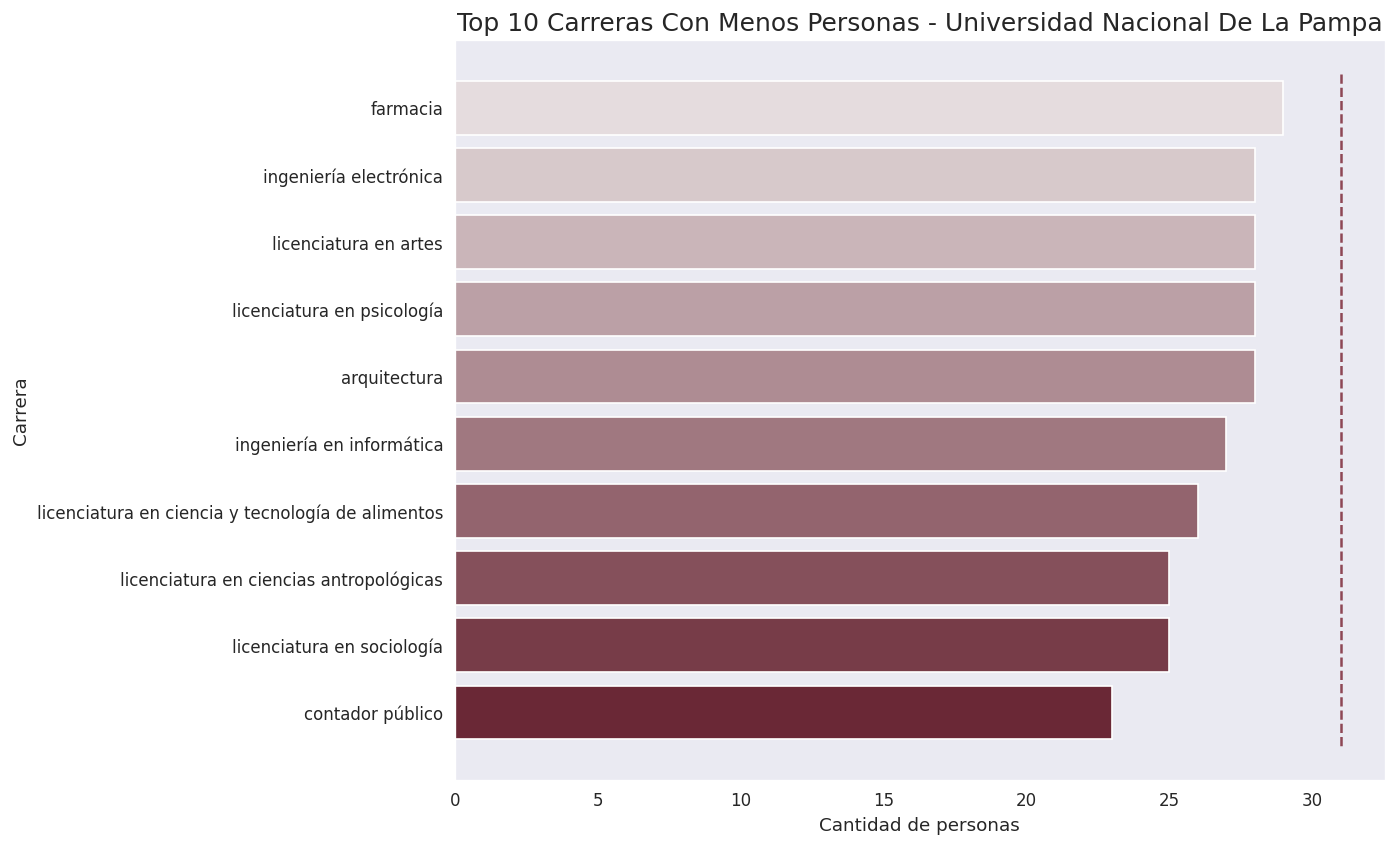

In [167]:
df_aux = df_1.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_1.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university1_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Como se puede observar en este gráfico, tanto las 10 mas concurridas y las 10 menos concurridas se encuentran cerca de la media, a excepcion de la mas concurrida que en si se separa mucho de la media.

Text(0, 0.5, 'Cantidad de carreras')

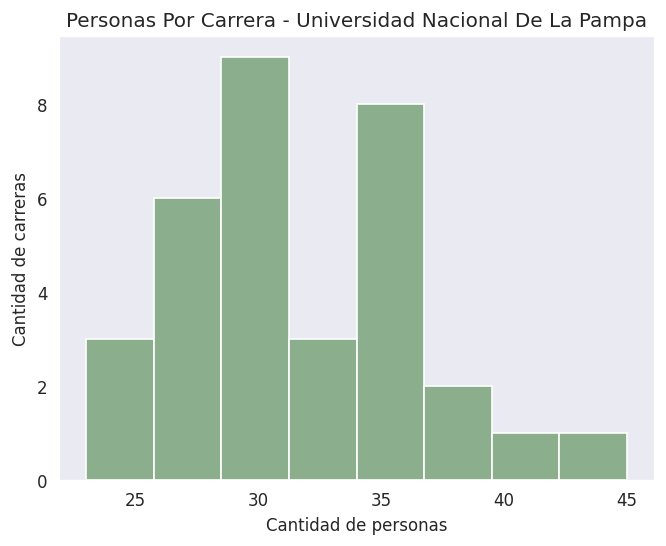

In [168]:
sns.histplot(df_1.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university1_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [169]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_1.career.value_counts().describe()

count    33.000000
mean     31.696970
std       4.700298
min      23.000000
25%      28.000000
50%      31.000000
75%      34.000000
max      45.000000
Name: career, dtype: float64

Como podémos observar la distribución de alumnos por carrera tiene una media de 31 alumnos y parece que la mayoria de las carreras concentra un numero parecido a este, en este caso la mayoría de las carreras tienen al menos 31 alumnos.

### Universidad Nacional de Villa Maria

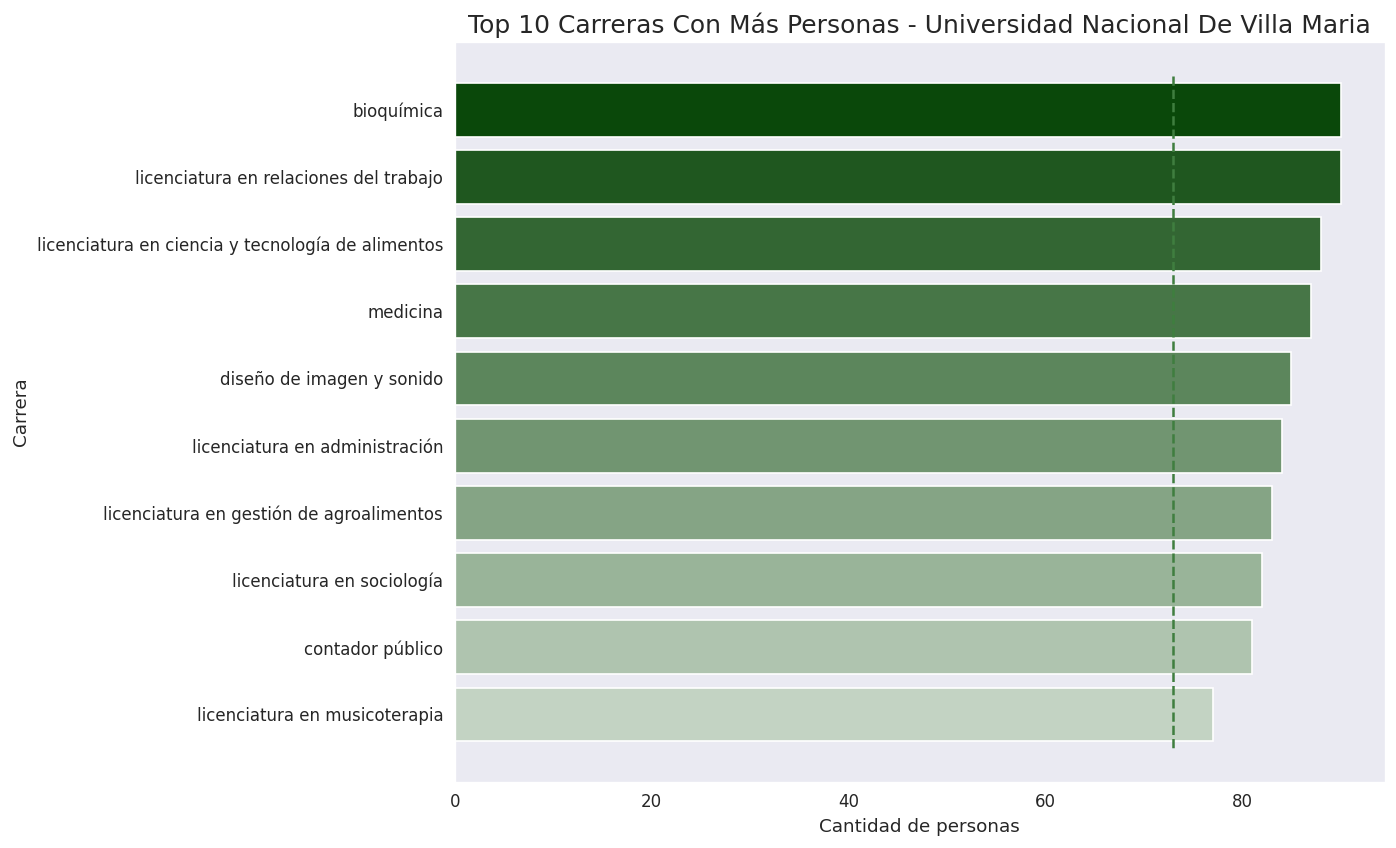

In [170]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.head(10), x='university', y='career', palette=colors_green, ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_green[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con más personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

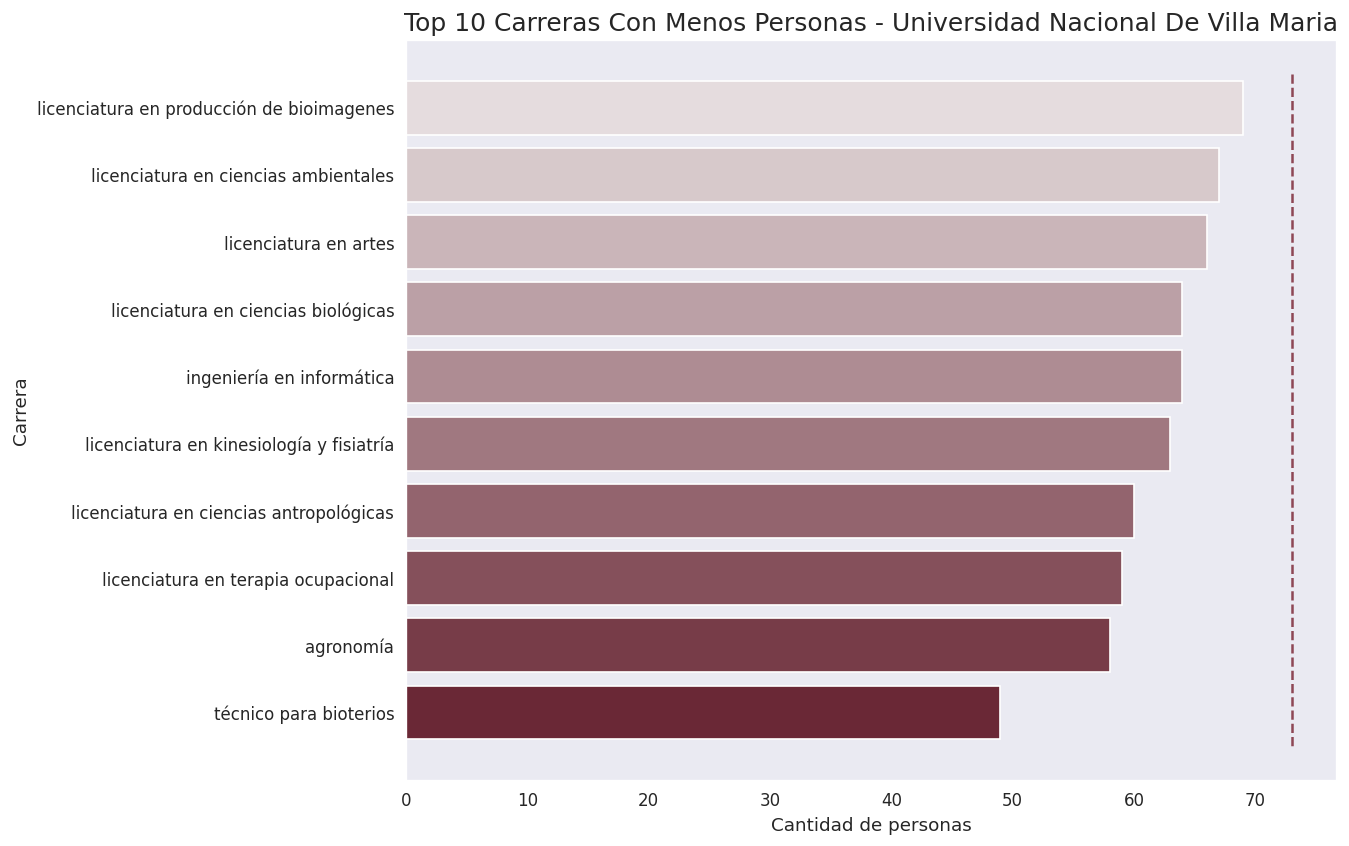

In [171]:
df_aux = df_2.groupby('career').count().reset_index().sort_values('university', ascending=False)
media_alumns_carrera = int(df_2.groupby('career').size().mean())

fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(data=df_aux.tail(10), x='university', y='career', palette=colors_red[10::-1], ax=ax)
ax.plot((media_alumns_carrera,media_alumns_carrera), (-0.5,9.5), color=colors_red[3],linestyle='dashed')
ax.set_title(f'Top 10 Carreras con menos personas - {university2_name}'.title(),{'fontsize':15})
ax.set_xlabel('Cantidad de personas', {'fontsize':11})
ax.set_ylabel('Carrera', {'fontsize':11})

plt.show()

Como se puede observar en este gráfico, tanto las 10 mas concucrridas y las 10 menos concurridas se encuentran cerca de la media, a excepcion de la menos concurrida que en si se separa mucho de la media.

Text(0, 0.5, 'Cantidad de carreras')

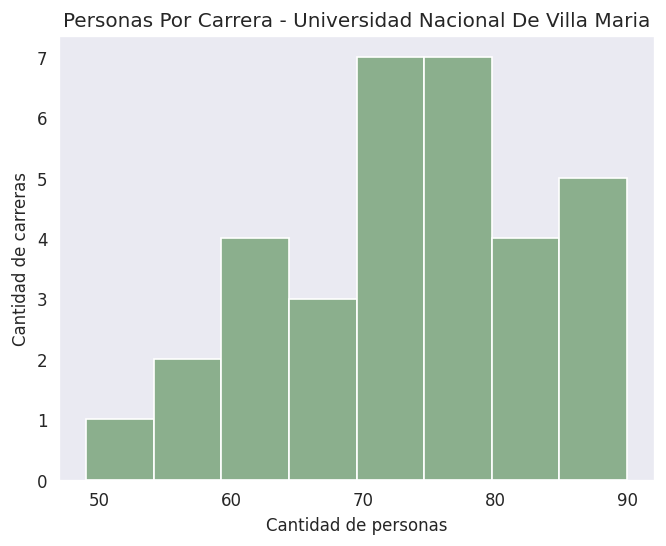

In [172]:
sns.histplot(df_2.career.value_counts(),bins=8, color=colors_green[5])
plt.title(f'Personas por carrera - {university2_name}'.title())
plt.xlabel('Cantidad de personas')
plt.ylabel('Cantidad de carreras')

In [173]:
#vemos los estadisticos de la distribucion de alumnos por carrera
df_2.career.value_counts().describe()

count    33.000000
mean     73.636364
std       9.864134
min      49.000000
25%      67.000000
50%      74.000000
75%      81.000000
max      90.000000
Name: career, dtype: float64

En este caso la media es de 73 alumnos por carrera, presentando un minímo de 49, pero la mayoría de las carreras tienen al menos 74 alumnos en esta universidad. Parece tratarse de una distribución normal de las edades con excepcion llegando a los 80 años donde se ve un aumento en la cantidad. 

### Análisis por género y edad - Universidad Nacional de La Pampa

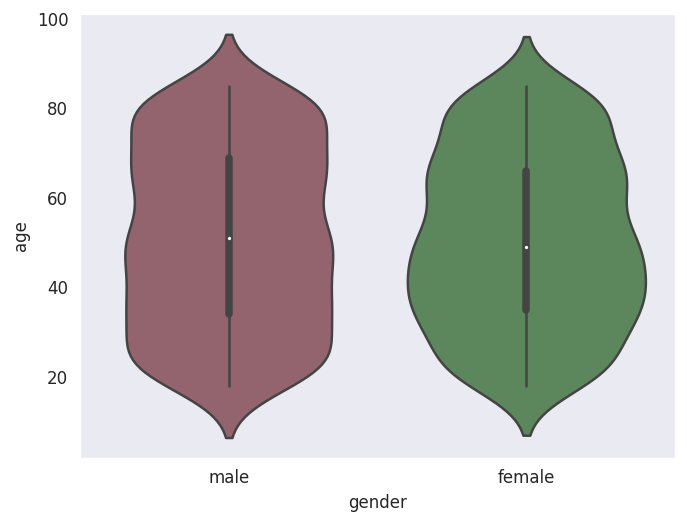

In [174]:
sns.violinplot(data=df_1,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

Si observamos la distribución de la edad utilizando los diagrámas de violín categorízado por el género vemos que ambos poseen una distribución uniforme, con una alta dispersión, donde podemos observar una modalidad para las mujeres al rededor de los 40 años

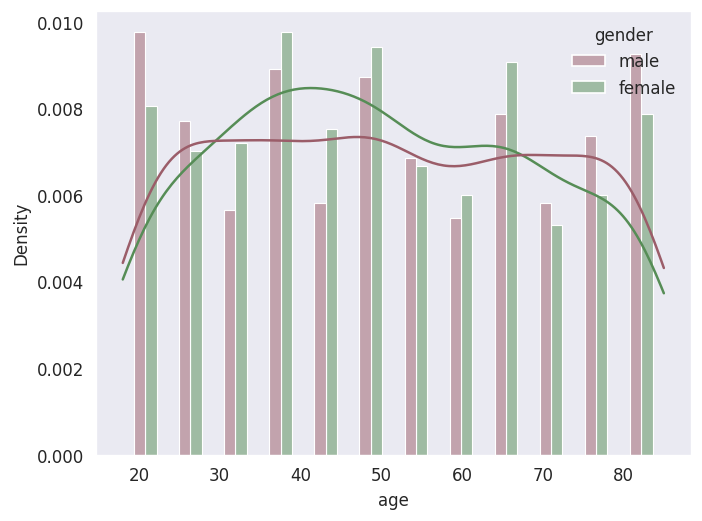

In [175]:
fig, ax = plt.subplots()
sns.histplot(data=df_1,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

Otra forma de visualizar esto es a través de un gráfico de tipo histograma categorizado y sus respectivas curvas de densidad aproximada. En este caso podemos ver la moda en la distribución de las mujeres. Y el pico a los 80 años

### Provincias - Universidad Nacional de La Pampa

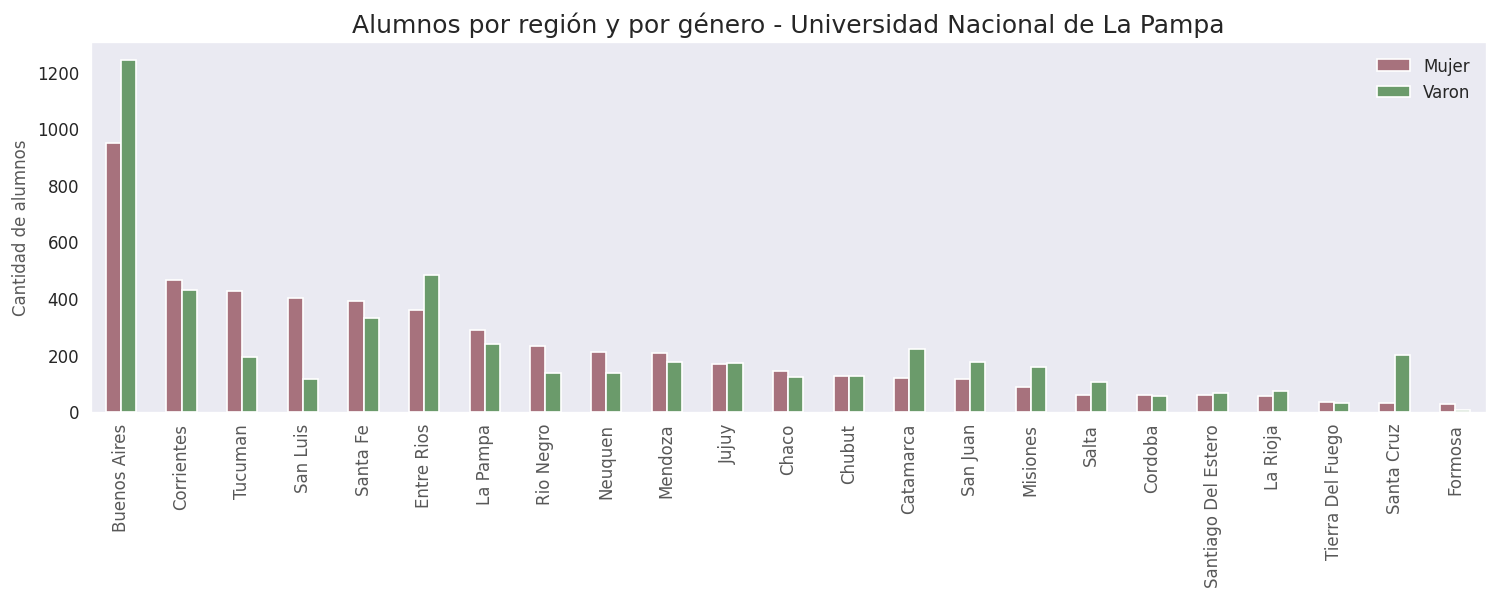

In [176]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_1geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'}
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university1_name}',{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

En este gráfico de barras apareadas y ordenadas de forma descendente por género. Respecto a la distribución de alumnos por provincia podemos observar que la gran mayoría de los alumnos provienen de la Provincia de Buenos Aires y es destacable la diferencia entre géneros donde se hace mas destacada en la provincia de corriente, San luis y Entre Rios.

Text(0.5, 0, '')

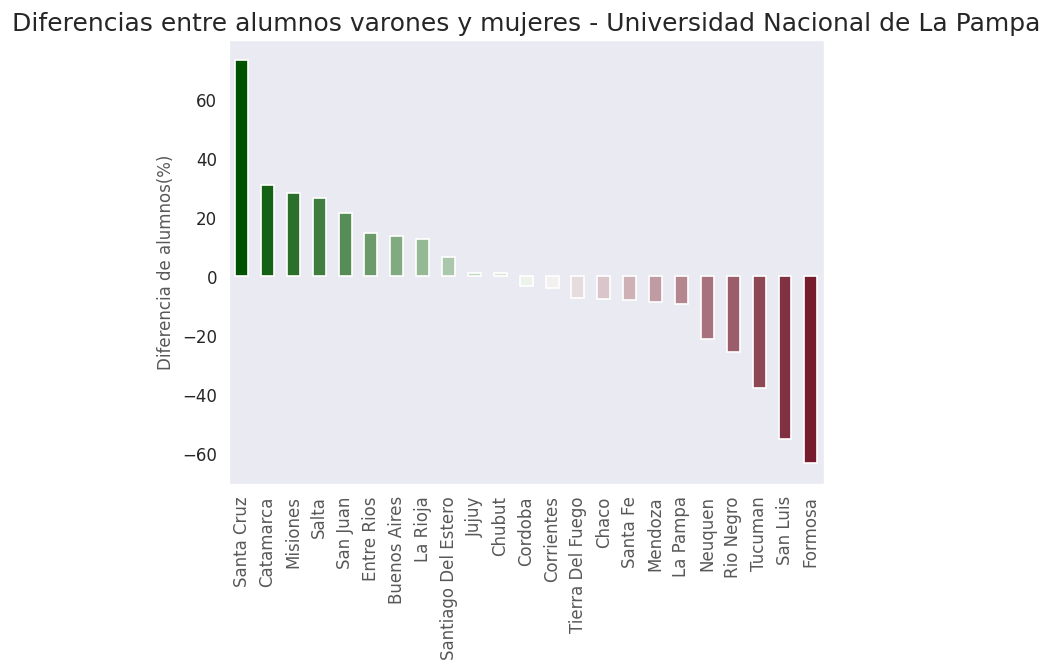

In [177]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres - {university1_name}',{'fontsize':15})
ax.set_ylabel('Diferencia de alumnos(%)',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

Con este gráfico podemos resumir como se ve la diferencia de alumnos para cada provincia en particular de forma porcentual. Neuquen es la que presenta mayor disparidad respecto a varones junto con Entre Rios. Respecto a disparidad de mujeres Santiago de Estero, Cordoba y Formoza son las que presentan mayor disparidad de alumnas provenientes de esas provincias.

### Localidades  - Universidad Nacional de La Pampa

In [178]:
df_1.location.value_counts().head(33)

arroyo grande              6
arroyo seco                4
algarrobo                  4
baños pismanta             4
francisco paz              4
9 de julio                 4
dos hermanos               4
aguada                     4
el brete                   4
castelar                   4
gregorio de laferrere      3
alma grande                3
arroyo                     3
pozo navagan               3
aguada de guerra           3
kilometro 125              3
ireneo portela             3
el pino                    3
landeta                    3
chivilcoy                  3
campo magnin               3
funke                      3
colonia san manuel         3
barrio jardin luzuriaga    3
estancia las gamas         3
centinela                  3
arroyo del rey             3
abra pampa                 3
cuenca                     3
alto verde                 3
barro negro                3
bella vista                3
empalme san carlos         3
Name: location, dtype: int64

arroyo grande     6
arroyo seco       4
algarrobo         4
baños pismanta    4
francisco paz     4
9 de julio        4
dos hermanos      4
aguada            4
el brete          4
castelar          4
Name: location, dtype: int64

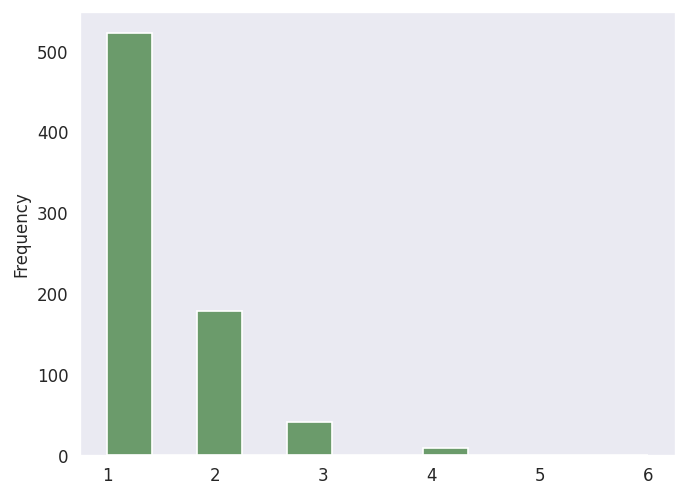

In [179]:
df_1.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])
df_1.location.value_counts().head(10)

Al parecer **hay pocas localidades que concentran la mayoria**  de alumnos a comparacion del resto siendo que a partir de la 7 localidad con mas alumnos ya solo aporta 10 alumnos cada 1.

### Análisis por género y edad - Universidad Nacional de Villa Maria

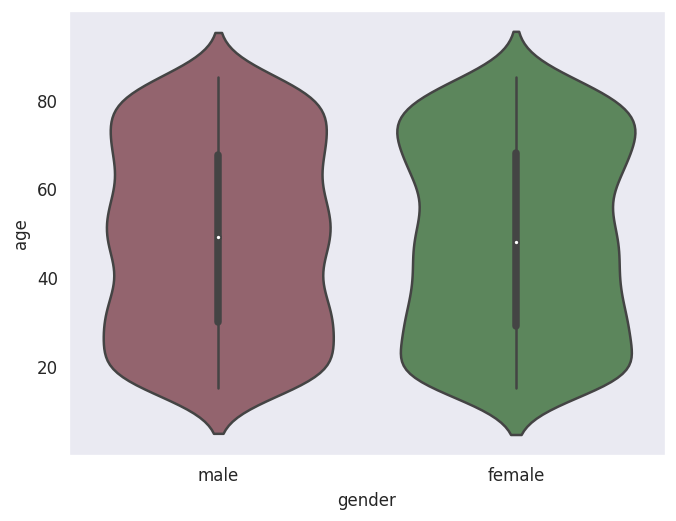

In [180]:
sns.violinplot(data=df_2,y='age', x='gender', palette=[colors_red[4], colors_green[4]])
plt.show()

Si observamos la distribución de la edad utilizando los diagrámas de violín categorízado por el género vemos que ambos poseen una distribución uniforme, con una alta dispersión, donde podemos observar una  pronunciada modalidad para las mujeres al rededor de los 80 años

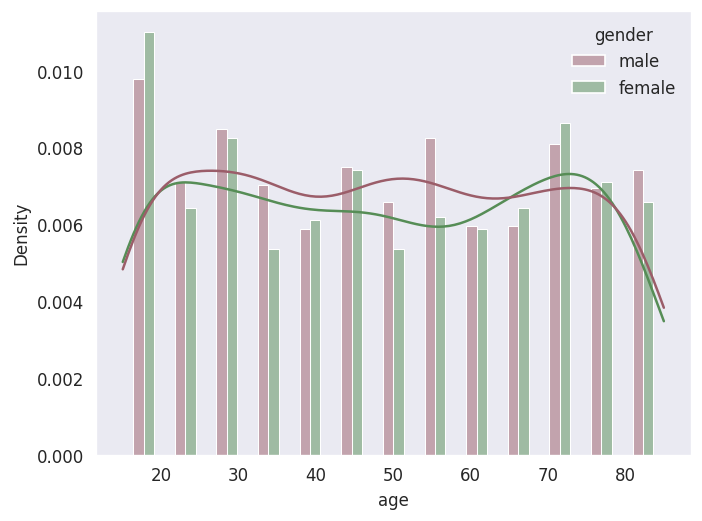

In [181]:
fig, ax = plt.subplots()
sns.histplot(data=df_2,
                x='age',
                hue='gender',
                kde=True,
                fill=True,
                multiple='dodge',
                shrink=.5,
                stat='density', 
                palette=[colors_red[4],
                colors_green[4]],
                ax=ax)
plt.show()
### top 10 localidades por alumnos

La distribución por edades parece ser dispersa entre todas las edades del espectro con un leve incremento para personas de 75 años.

### Provincias - Universidad Nacional de Villa Maria

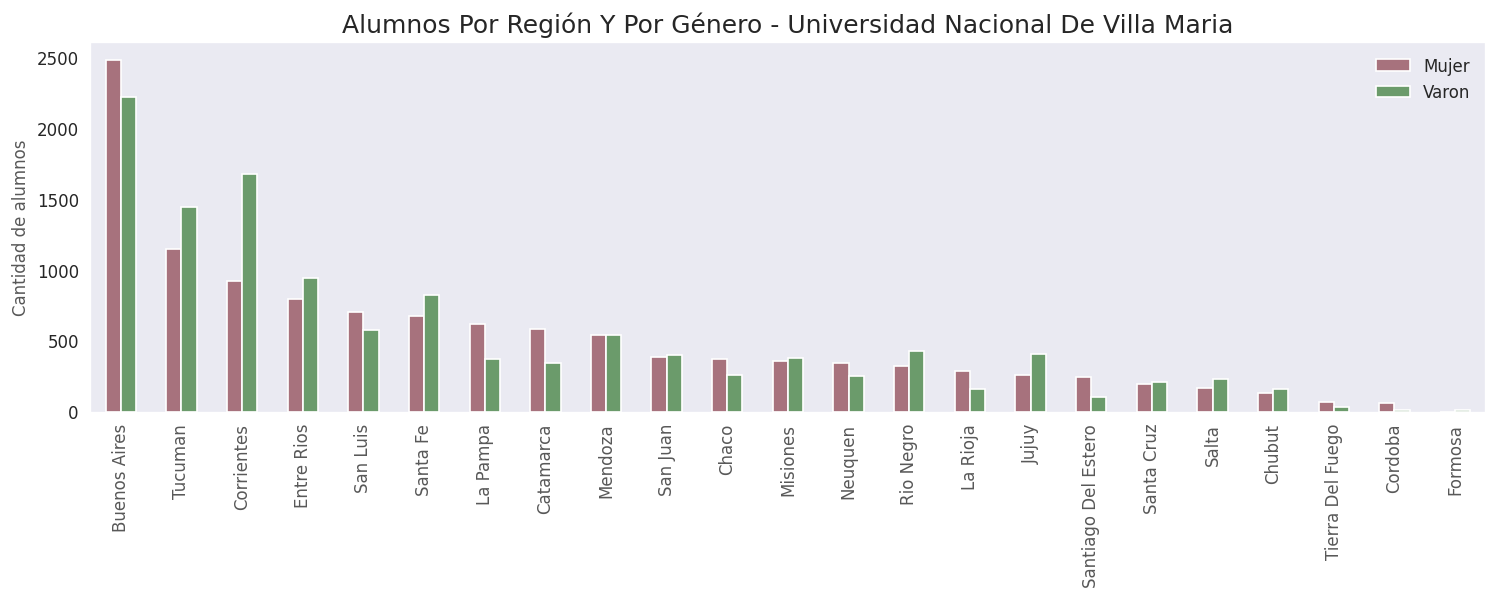

In [182]:
fig,ax=plt.subplots(figsize=(15,4))
df_aux = df_2geonames_merge.pivot_table(
    index=['region'],
    columns='gender',
    values=['first_name'],
    aggfunc={'region':'count'},
).sort_values(by=[('region','female')], ascending=False)

df_aux.plot(kind='bar',color=(colors_red[5],colors_green[5]),ax=ax)
ax.set_title(f'Alumnos por región y por género - {university2_name}'.title(),{'fontsize':15})
ax.set_ylabel('Cantidad de alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')
ax.legend(labels=['Mujer','Varon'])
plt.show()

Text(0.5, 0, '')

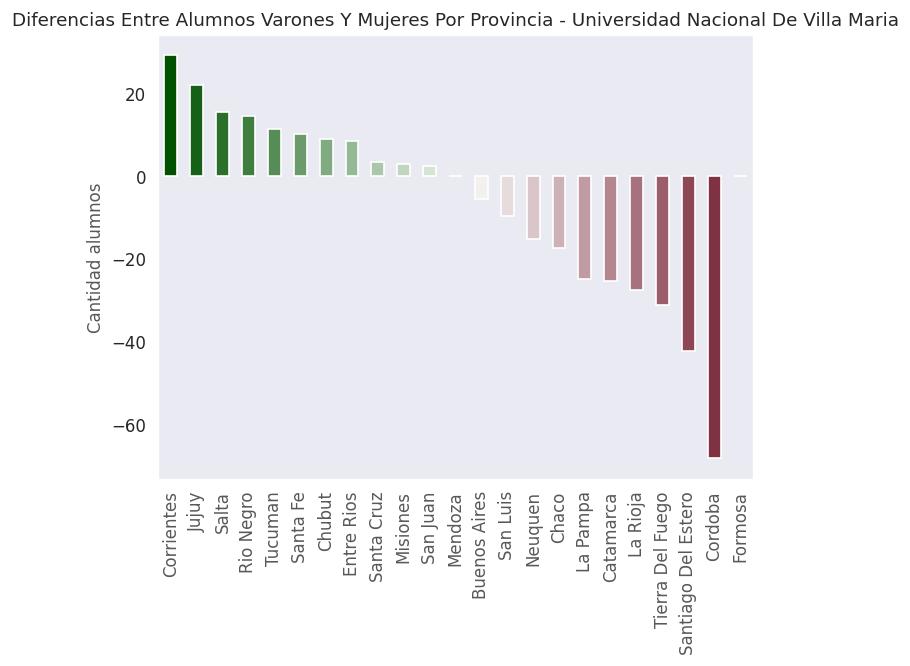

In [183]:
fig,ax = plt.subplots()

df_aux_2 = (df_aux.diff(axis=1)[(('region', 'male'))]) / df_aux.sum(axis=1) * 100

df_aux_2.sort_values(ascending=False).plot(kind='bar', x='region',ax=ax,color=colors_green+colors_red[::-1])

ax.set_title(f'Diferencias entre alumnos varones y mujeres por provincia - {university2_name}'.title(),{'fontsize':11})
ax.set_ylabel('Cantidad alumnos',{'color':colors_dark[3]})
ax.tick_params(axis='x', colors=colors_dark[3])
ax.set_xlabel('')

Como se puede ver Buenos Aires concentra una disparidad de alumnos a favor y siendo la provincia que mas personas aporta la cantidad de mujeres por sobre hombres es significativa, mientras que porcentualmente  las provincias con mas disparidad en mayoria hombres son Salta y Santa Cruz, y para el lado de las mujeres es Tierra del Fuego.

### Localidades - Universidad Nacional de Villa Maria

In [184]:
df_2.location.value_counts().head(10)

algarrobo        10
agua colorada     9
el porvenir       8
buena vista       8
alto verde        7
caseros           7
centenario        7
angostura         7
bella vista       7
25 de mayo        7
Name: location, dtype: int64

<AxesSubplot: ylabel='Frequency'>

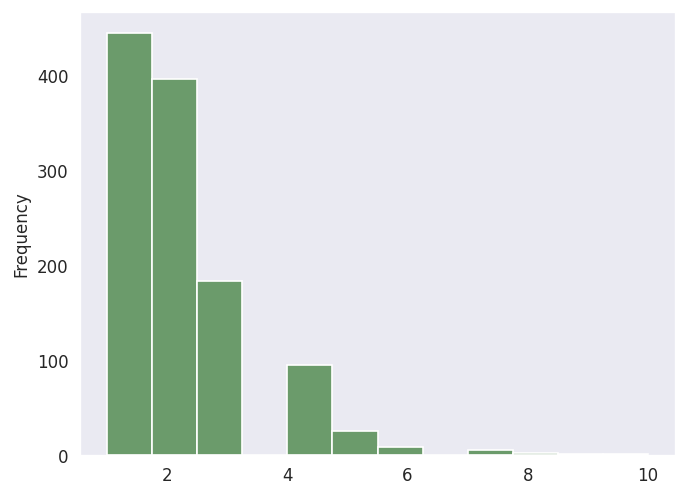

In [185]:
df_2.location.value_counts().plot(kind='hist', bins=12,color=colors_green[5])



Como se ve no hay localidades que concentre un gran numero de alumnos. Siendo que todas las localidades aportan un numero similar

### Segregación por tipo de carrera

In [186]:
def clasificador(x):
    
    clasificador ={
    'exactas_nat':['agronomía','licenciatura en ciencias biológicas','licenciatura en ciencias ambientales','licenciatura en ciencias biológicas', 'licenciatura en ciencias geológicas', 
    'técnico para bioterios', 'ingeniería electrónica', 'ingeniería en informática','ingeniería mecánica','licenciatura en ciencias de la computación'],
    'ciencias_salud':['ciencias veterinarias','farmacia','licenciatura en kinesiología y fisiatría','licenciatura en producción de bioimagenes','medicina','licenciatura en gestión de agroalimentos', 'licenciatura en ciencia y tecnología de alimentos','bioquímica'],
    'diseño_art':['diseño industrial', 'diseño de imagen y sonido', 'licenciatura en artes', 'licenciatura en musicoterapia', ],
    'empresarial':['actuario', 'contador público','licenciatura en administración'],
    'sociales':['licenciatura en ciencias antropológicas','licenciatura en ciencias de la educación','licenciatura en psicología', 'licenciatura en relaciones del trabajo','licenciatura en sociología','licenciatura en terapia ocupacional']
}
    if x in clasificador['exactas_nat']:
        return "Exactas y Naturales"
    elif x in clasificador['diseño_art']:
        return "Artes y Diseño"
    elif x in clasificador['empresarial']:
        return "Ciencias Empresariales"
    elif x in clasificador['ciencias_salud']:
        return "Salud"
    else:
        return "Sociales"
df_1['tipo_career'] = df_1.career.apply(clasificador)
df_2['tipo_career'] = df_2.career.apply(clasificador)

### Proporción de alumnos por tipo de carrera y género

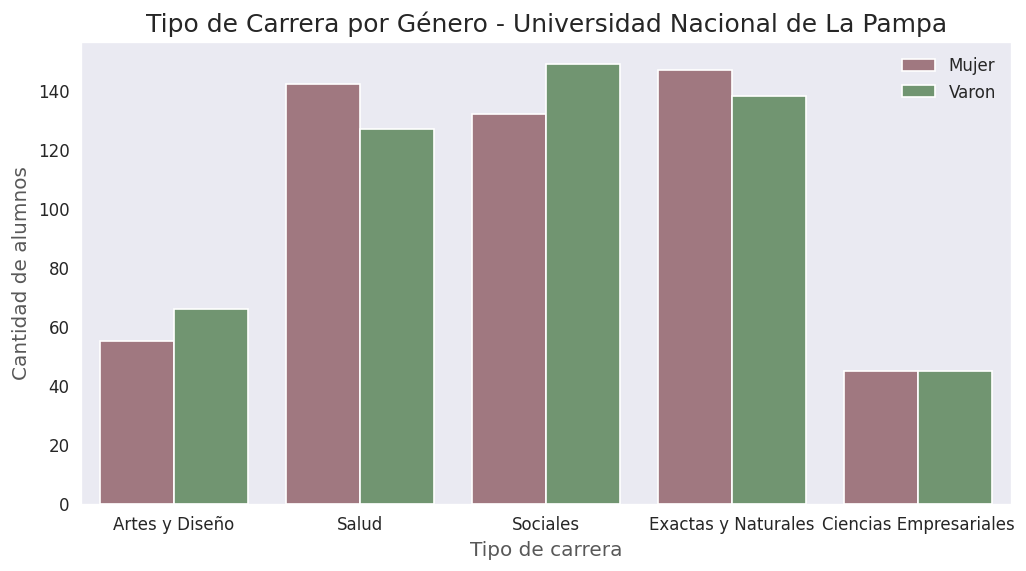

In [187]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_1,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university1_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])


En la Universidad nacional de la Pampa parece haber cierta disparidad de varones frente a mujeres en todos los tipos de carreras a diferencia ciencias empresariales que comparten proporcion 

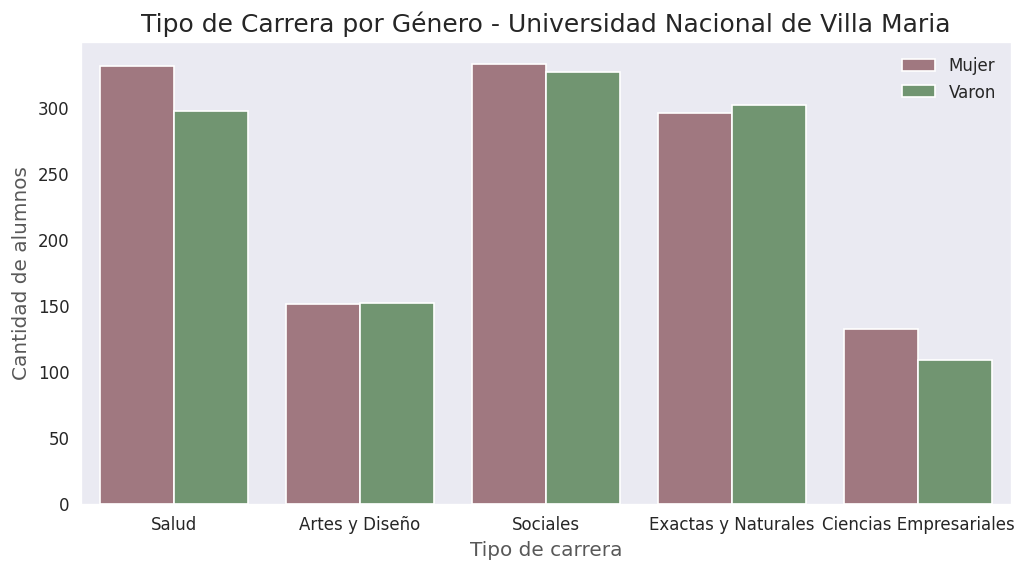

In [188]:
fig,ax = plt.subplots(figsize=(10,5))
g = sns.countplot(data=df_2,
                    x='tipo_career',
                    hue='gender',
                    palette=[colors_red[5],
                    colors_green[5]],
                    ax=ax)

g.set_title(f'Tipo de Carrera por Género - {university2_name}',{'fontsize':15})
g.set_ylabel('Cantidad de alumnos',{'fontsize':12,'color':colors_dark[3]})
g.set_xlabel('Tipo de carrera',{'fontsize':12,'color':colors_dark[3]})
g.set_xticklabels(labels=g.get_xticklabels())
ax.legend(labels=['Mujer','Varon'])

Por último si diferenciamos por tipo de carrera podemos ver que la disparidad de mujeres por mayoria se en todas las areas excepto exactas y naturales  donde hay una leve mayoria de hombres.

### Top Carreras por Proporción de Alumnas - Universidad Nacional de La Pampa

In [189]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.head()

gender,female,male
career,,
licenciatura en ciencias de la computación,0.685714,0.314286
licenciatura en artes,0.678571,0.321429
ciencias veterinarias,0.650000,0.350000
ingeniería mecánica,0.617647,0.382353
arquitectura,0.607143,0.392857


**Las mayoría de las carreras que más proporción tiene de mujeres corresponde a carreras relacionadas a licenciatura en ciencias de la computacion.**

In [190]:
top_carreer_f = (df_1.groupby(['gender','career']).size() / df_1.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f.tail()

gender,female,male
career,,
licenciatura en ciencias geológicas,0.419355,0.580645
farmacia,0.413793,0.586207
técnico para bioterios,0.406250,0.593750
agronomía,0.363636,0.636364
licenciatura en producción de bioimagenes,0.282051,0.717949


### Top Carreras por Proporción de Alumnas - Universidad Nacional de Villa Maria

In [191]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.head()

gender,female,male
career,,
licenciatura en ciencias ambientales,0.641791,0.358209
ingeniería en informática,0.609375,0.390625
arquitectura,0.584416,0.415584
licenciatura en ciencias de la educación,0.561644,0.438356
licenciatura en administración,0.559524,0.440476


 las mas destacables podemos ver que son licenciatura en ciencias ambientales y ingenieria informatica

In [192]:
top_carreer_f_2 = (df_2.groupby(['gender','career']).size() / df_2.groupby('career').size()).unstack().T.sort_values(by='female',ascending=False)
top_carreer_f_2.tail()

gender,female,male
career,,
licenciatura en planificación y diseño del paisaje,0.407895,0.592105
ingeniería electrónica,0.394737,0.605263
ciencias veterinarias,0.394366,0.605634
licenciatura en gestión de agroalimentos,0.385542,0.614458
contador público,0.358025,0.641975


Las carreras con menos porcentaje de mujeres en esta universidad corresponden a contador publico y diseño del paisaje	y licenciatura en gestión de agroalimentos	

### Algunos ejemplos

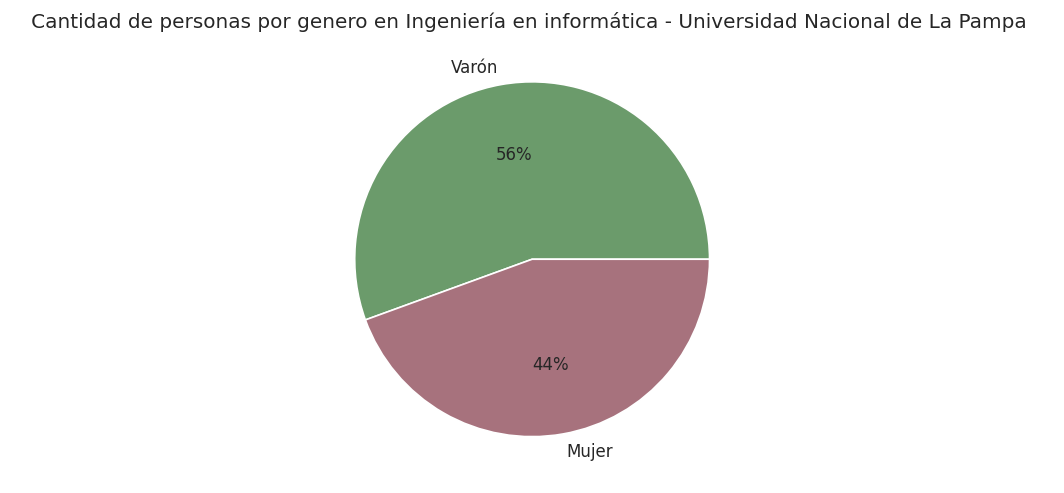

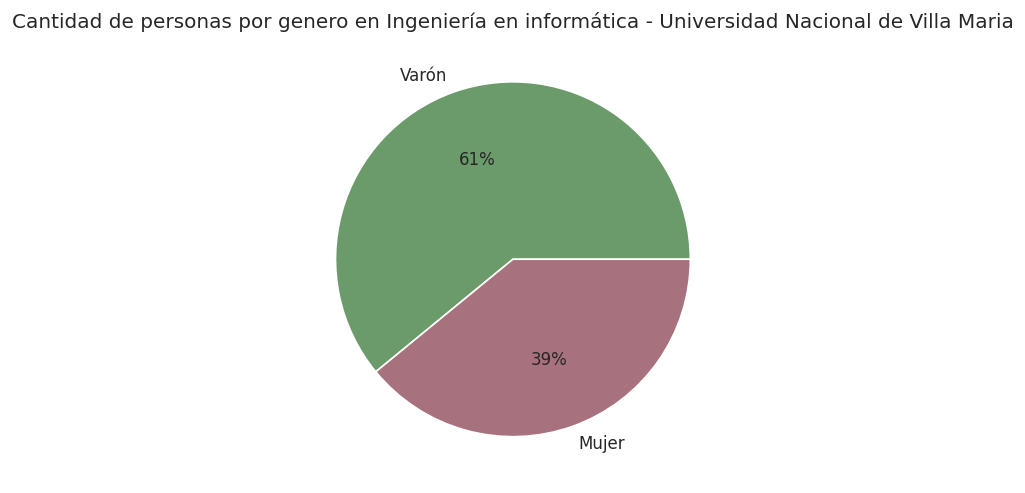

In [193]:
career = 'ingeniería en informática'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()


La carrera de informática suele tener el prejuicio de ser una carrera propia de varones, sin embargo, en estos dos casos podemos ver que hay una gran paridad entre la cantidad de hombres y de mujeres que la cursan.

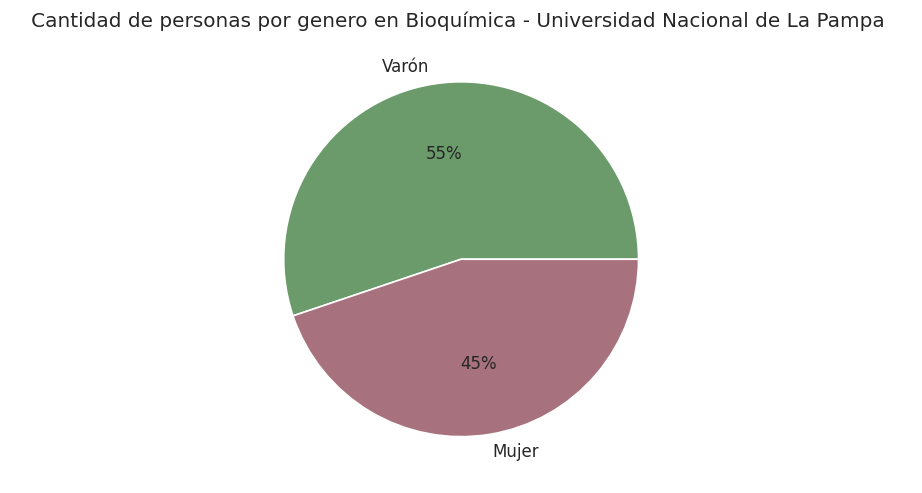

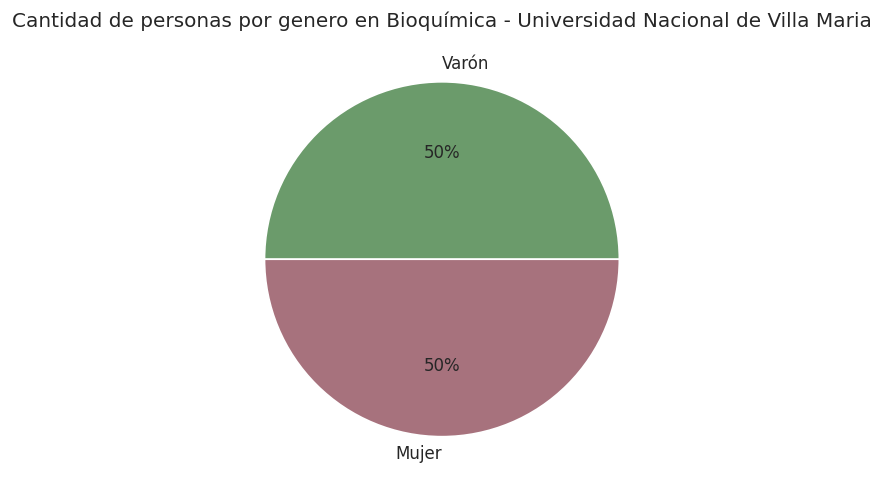

In [194]:
career = 'bioquímica'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

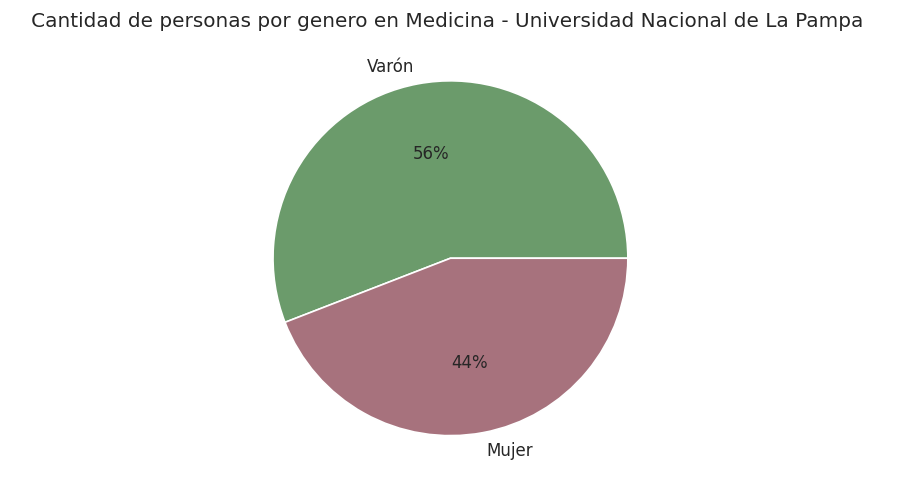

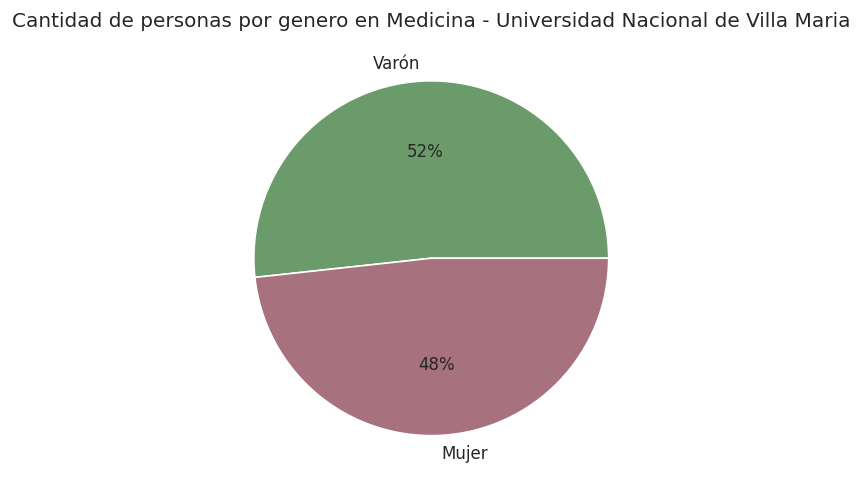

In [195]:
career = 'medicina'

df_aux = df_1.query(f'career == "{career}"').gender.value_counts()

colors = sns.color_palette('pastel')
labels = ['Varón', 'Mujer']
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'   Cantidad de personas por genero en {career.capitalize()} - {university1_name}    ')
plt.show()

df_aux = df_2.query(f'career == "{career}"').gender.value_counts()
plt.pie(df_aux, colors = (colors_green[5],colors_red[5]), labels=labels, autopct = '%0.0f%%')

plt.title(f'Cantidad de personas por genero en {career.capitalize()} - {university2_name}')
plt.show()

Tanto en Bioquímica como en Medicina, dos carreras que suelen tener el prejuicio de tener más mujeres en ambas carreras para ambas universidades muestran una prevalencia de varones.

# Conclusiones

- Tanto la Universidad Nacional de La Pampa como en la Universidad Nacional de Villa maria vemos una distribucion uniforme aunque prevalecen las personas jovenes de 15 a 20 con un poco de mayor porcentaje frente a los demas rangos de edades. Como podemos ver clases a la noche podria influir en mayor cantidad de personas de mayor edad que se inscriban.

- En la Universidad Nacional de La Pampa como en la Universidad Nacional de Villa maria no se ve que halla pocas localidades con gran concentracion de alumnos.

- Tanto la Universidad Nacional de La Pampa como la Universidad Nacional de Villa Maria no tienen una gran disparidad en la cantidad de alumnas mujeres comparada con la de los hombres , pero si llama la atencion que aun teniendo poca disparidad en algunas areas, las carreras informaticas si siguen teniendo una gran disparidad en favor de los hombres a pesar de la poca disparidad en las diferentes areas.